In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import matplotlib.ticker as plticker

## Independent Medical Review (IMR) Determination & Trends

This data is from the California Department of Managed Health Care (DMHC). It contains all decisions from Independent Medical Reviews (IMR) administered by the DMHC since January 1, 2001. An IMR is an independent review of a denied, delayed, or modified health care service that the health plan has determined to be not medically necessary, experimental/investigational or non-emergent/urgent. If the IMR is decided in an enrollees favor, the health plan must authorize the service or treatment requested.

In [2]:
# Resaved file as 'CSV UTF-8'.
imr = pd.read_csv('data/imr_trends.csv')
imr.head()

,ReferenceID,ReportYear,DiagnosisCategory,DiagnosisSubCategory,TreatmentCategory,TreatmentSubCategory,Determination,Type,AgeRange,PatientGender,IMRType,DaysToReview,DaysToAdopt,Findings
0,MN20-32737,2020,Mental Disorder,Anxiety,Mental Health,RTC,Overturned Decision of Health Plan,Medical Necessity,11 to 20,Female,Expedited,1.0,12,Nature of Statutory Criteria/Case Summary: The...
1,MN20-32736,2020,Immuno Disorders,Arthritis,Pharmacy,Pain Medication,Overturned Decision of Health Plan,Medical Necessity,51 to 64,Female,Expedited,2.0,12,Nature of Statutory Criteria/Case Summary: The...
2,MN20-32735,2020,Digestive System/ GI,Crohn's Disease,Pharmacy,Biologics,Overturned Decision of Health Plan,Medical Necessity,21 to 30,Female,Expedited,5.0,11,Nature of Statutory Criteria/Case Summary: The...
3,MN20-32734,2020,Orth/Musculoskeletal,Shoulder Problem/Pain,Pharmacy,Anti-Depressants,Upheld Decision of Health Plan,Medical Necessity,51 to 64,Female,Expedited,2.0,26,Nature of Statutory Criteria/Case Summary: The...
4,MN20-32733,2020,Mental Disorder,AlcoholAbuse/Addiction,Mental Health,RTC,Overturned Decision of Health Plan,Medical Necessity,31 to 40,Male,Expedited,3.0,12,Nature of Statutory Criteria/Case Summary: The...


In [3]:
# 'Treatment SubCategory' and 'DiagnosisSubcategory' are missing 2 values.
# 'AgeRange' and 'PatientGender' are missing 685 values.
# 'DaysToReview' is missing 663 values.
#  What to do with the missing data?
# Apply mean or medican to fill in the missing values for "DaysToReview".
# "AgeRange" and "PatientGender" are slightly more challenging. 
# Suspect some cases gender corresponds with a certain diagnosis and/or treatment category, e.g. women and OB/NY.
# Suspect some cases the age corresponds with certain diagnoses and treatment categories, e.g. children and pediatrics.
# A thorough deep dive would be required to correctly fill the missing values. 
#  Filling in the low number would provide limited value.
imr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28773 entries, 0 to 28772
Data columns (total 14 columns):
ReferenceID             28773 non-null object
ReportYear              28773 non-null int64
DiagnosisCategory       28773 non-null object
DiagnosisSubCategory    28771 non-null object
TreatmentCategory       28773 non-null object
TreatmentSubCategory    28771 non-null object
Determination           28773 non-null object
Type                    28773 non-null object
AgeRange                28088 non-null object
PatientGender           28088 non-null object
IMRType                 28773 non-null object
DaysToReview            28110 non-null float64
DaysToAdopt             28773 non-null int64
Findings                28773 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.1+ MB


In [4]:
(2+685+663)#/28773

1350

In [5]:
imr.describe()

,ReportYear,DaysToReview,DaysToAdopt
count,28773.000000,28110.000000,28773.000000
mean,2012.631877,17.037887,38.266291
std,4.998202,10.173357,21.128702
min,2001.000000,0.000000,2.000000
25%,2009.000000,9.000000,28.000000
50%,2014.000000,19.000000,37.000000
75%,2017.000000,21.000000,46.000000
max,2020.000000,133.000000,636.000000


---
## Unique Values

In [6]:
# TREATMENT CATEGORIES
unq0 = list(imr['Determination'].unique())
print('# of Unique Deterimnation Outcomes: {}'.format(len(unq0)))
print('\n')
print(unq0)

# of Unique Deterimnation Outcomes: 2


['Overturned Decision of Health Plan', 'Upheld Decision of Health Plan']


In [7]:
# DIAGNOSIS CATEGORIES
# CNS = Central Nervous System
# GI = Gastronintenstinal
# OB/GYN = Obstretician and Gynecologist
unq1 = list(imr['DiagnosisCategory'].unique())
print('# of Unique Diagnosis Categories: {}'.format(len(unq1)))
print('\n')
print(unq1)

# of Unique Diagnosis Categories: 29


['Mental Disorder', 'Immuno Disorders', 'Digestive System/ GI', 'Orth/Musculoskeletal', 'Cancer', 'CNS/ Neuromusc Dis', 'Skin Disorders', 'Endocrine/Metabolic', 'Cardiac/Circ Problem', 'Autism Spectrum', 'GU/ Kidney Disorder', 'Pediatrics', 'Blood Related Disord', 'Prevention/Good Hlth', 'Genetic Diseases', 'Vision', 'Foot Disorder', 'Dental Problems', 'Respiratory System', 'Ears/Nose/Throat', 'Trauma/ Injuries', 'Infectious Disease', 'Pregnancy/Childbirth', 'Post Surgical Comp', 'Morbid Obesity', 'OB-GYN/ Pregnancy', 'Chron Pain Synd', 'Not Applicable', 'Other']


In [8]:
# DIAGNOSIS SUBCATEGORIES
unq1b = list(imr['DiagnosisSubCategory'].unique())
print('# of Unique Diagnosis Subcategories: {}'.format(len(unq1b)))
print('\n')
#print(unq1b)

# of Unique Diagnosis Subcategories: 396




In [9]:
# TREATMENT CATEGORIES
unq2 = list(imr['TreatmentCategory'].unique())
print('# of Unique Treatment Categories: {}'.format(len(unq2)))
print('\n')
print(unq2)

# of Unique Treatment Categories: 34


['Mental Health', 'Pharmacy', 'Cancer Care', 'Orthopedic Proc', 'Reconstr/Plast Proc', 'Pain Management', 'Diag Imag & Screen', 'Diag/ MD Eval', 'Rehab/ Svc - Outpt', 'Autism Related Tx', 'Ob-Gyn Proc', 'Urology Proc', 'Gen Surg Proc', 'Elect/Therm/Radfreq', 'DME', 'Special Proc', 'Ear-Nose-Thro Proc', 'Vision Services/Ophthalmology', 'Dent/Orthodont Proc', 'Acute Med Svc Inpt', 'Neurosurgery Proc', 'Cardio-Vasc Proc', 'Rehab/Svcs SNF Inpt', 'Chiropractic Care', 'Alternative Tx', 'Home Health Care', 'Transportation', 'Not Applicable', 'Emergency/Urg Care', 'Vision Services', 'Ophthalmology Proc', 'Prev Health Screen', 'MLTSS', 'Gen Surg proc']


In [10]:
# TREATMENT SUBCATEGORIES
unq2b = list(imr['TreatmentSubCategory'].unique())
print('# of Unique Treatment Subcategories: {}'.format(len(unq2b)))
print('\n')
#print(unq2b)

# of Unique Treatment Subcategories: 369




In [11]:
# AGE RANGE
unq3 = list(imr['AgeRange'].unique())
print('# of Unique Age Ranges: {}'.format(len(unq3)))
print('\n')
print(unq3)

# of Unique Age Ranges: 8


['11 to 20', '51 to 64', '21 to 30', '31 to 40', '65+', '41 to 50', '0 to 10', nan]


In [12]:
# Type
unq4 = list(imr['Type'].unique())
print('# of Unique Type Descriptions: {}'.format(len(unq4)))
print('\n')
print(unq4)

# of Unique Type Descriptions: 3


['Medical Necessity', 'Experimental/Investigational', 'Urgent Care']


In [13]:
# IMR Type
unq5 = list(imr['IMRType'].unique())
print('# of Unique IMR Types: {}'.format(len(unq5)))
print('\n')
print(unq5)

# of Unique IMR Types: 2


['Expedited', 'Standard']


In [14]:
years = sorted(list(imr['ReportYear'].unique()))
years_x_axis = [0] + [y for y in years if y % 2 == 1]
print('# of Years Reported: {}'.format(len(years)))
print('\n')
print(years)

# of Years Reported: 20


[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [15]:
years_x_axis

[0, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]

### Questions, thoughts & notes related unique values

- Perform keyword analysis on treatment and/or diagnosis subcategories?

---
## Handling Missing Data

Avg. Days to Review: 17.0
Median Days to Review: 19.0
Mode of Days to Review: 0    21.0
dtype: float64


C:\Users\morga\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morga\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


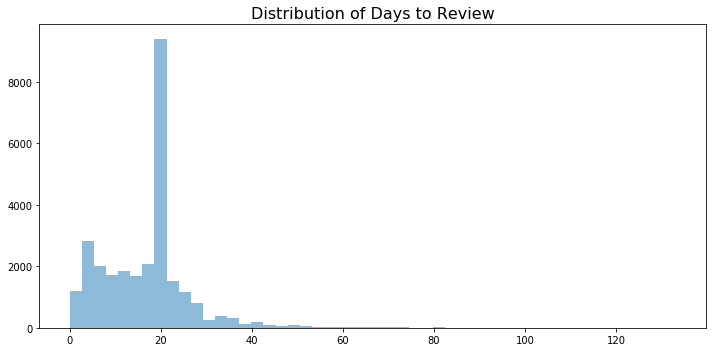

In [16]:
# HISTOGRAM OF DAYS TO REVIEW
# Suspect that the arbitrators have a deadline of 21 days/3 weeks to complete the review.
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(imr['DaysToReview'], bins=50, alpha=0.5)
ax.set_title('Distribution of Days to Review', fontsize=16)
plt.tight_layout();


print('Avg. Days to Review: {:.1f}'.format(imr['DaysToReview'].mean()))
print('Median Days to Review: {:.1f}'.format(imr['DaysToReview'].median()))
print('Mode of Days to Review: ' + str((imr['DaysToReview'].mode())))

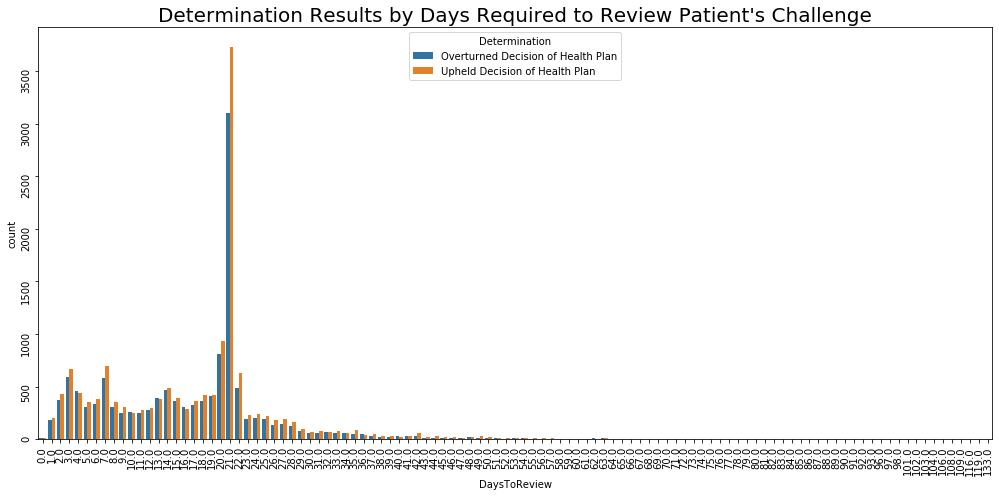

In [17]:
# DETERMINATION RESULTS BY DAYS TO REVIEW

fig, ax = plt.subplots(figsize=(14,7))
g = sns.countplot(x='DaysToReview', data=imr, hue='Determination')
ax.set_title("Determination Results by Days Required to Review Patient's Challenge", fontsize=20)
ax.tick_params(labelrotation=90)
plt.tight_layout();

In [18]:
# Apply "DaysToReview" median to fill missing values within the feature.
imr['DaysToReview'].fillna(imr['DaysToReview'].median(), inplace=True)
imr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28773 entries, 0 to 28772
Data columns (total 14 columns):
ReferenceID             28773 non-null object
ReportYear              28773 non-null int64
DiagnosisCategory       28773 non-null object
DiagnosisSubCategory    28771 non-null object
TreatmentCategory       28773 non-null object
TreatmentSubCategory    28771 non-null object
Determination           28773 non-null object
Type                    28773 non-null object
AgeRange                28088 non-null object
PatientGender           28088 non-null object
IMRType                 28773 non-null object
DaysToReview            28773 non-null float64
DaysToAdopt             28773 non-null int64
Findings                28773 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.1+ MB


In [19]:
# 689 missing values, 2.3% of initial dataset, after filling in the "DaysToReview".
# Reasonable to drop the values.
drop_na_test = imr.dropna(axis=0)
drop_na_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28084 entries, 0 to 28290
Data columns (total 14 columns):
ReferenceID             28084 non-null object
ReportYear              28084 non-null int64
DiagnosisCategory       28084 non-null object
DiagnosisSubCategory    28084 non-null object
TreatmentCategory       28084 non-null object
TreatmentSubCategory    28084 non-null object
Determination           28084 non-null object
Type                    28084 non-null object
AgeRange                28084 non-null object
PatientGender           28084 non-null object
IMRType                 28084 non-null object
DaysToReview            28084 non-null float64
DaysToAdopt             28084 non-null int64
Findings                28084 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.2+ MB


In [20]:
imr2 = imr.dropna(axis=0)
imr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28084 entries, 0 to 28290
Data columns (total 14 columns):
ReferenceID             28084 non-null object
ReportYear              28084 non-null int64
DiagnosisCategory       28084 non-null object
DiagnosisSubCategory    28084 non-null object
TreatmentCategory       28084 non-null object
TreatmentSubCategory    28084 non-null object
Determination           28084 non-null object
Type                    28084 non-null object
AgeRange                28084 non-null object
PatientGender           28084 non-null object
IMRType                 28084 non-null object
DaysToReview            28084 non-null float64
DaysToAdopt             28084 non-null int64
Findings                28084 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.2+ MB


In [21]:
imr2.describe()

,ReportYear,DaysToReview,DaysToAdopt
count,28084.000000,28084.000000,28084.000000
mean,2012.890828,17.055441,38.330651
std,4.770499,10.134162,21.293209
min,2001.000000,0.000000,2.000000
25%,2009.000000,9.000000,27.000000
50%,2014.000000,19.000000,37.000000
75%,2017.000000,21.000000,46.000000
max,2020.000000,133.000000,636.000000


---
## Exploratory Visualizations
<br><br>
Only reference imr2 below this point.

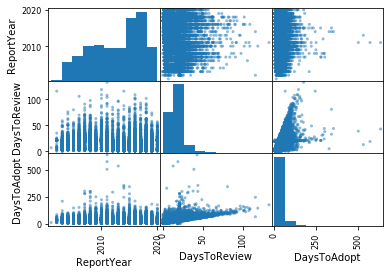

In [22]:
pd.plotting.scatter_matrix(imr2);

In [23]:
# Deliniated by 'Determination'
yr_grpd_1 = imr2.groupby(['ReportYear', 'Determination']).agg({'Determination':'count'})
yr_grpd_1.columns = ['count']
yr_grpd_1.reset_index(inplace=True)
yr_ovrtrnd = yr_grpd_1[yr_grpd_1['Determination'] == 'Overturned Decision of Health Plan']
yr_upheld = yr_grpd_1[yr_grpd_1['Determination'] == 'Upheld Decision of Health Plan']

# Total "Determinations" per year.
yr_grpd_2 = imr2.groupby(['ReportYear']).agg({'Determination':'count'})
yr_grpd_2.columns = ['count']
yr_grpd_2.reset_index(inplace=True)

# Merge
det_yr = pd.merge(yr_grpd_2, yr_ovrtrnd, how='left', on='ReportYear')
det_yr = pd.merge(det_yr, yr_upheld, how='left', on='ReportYear')
det_yr.rename({'count_x':'total_reviewed', 'count_y':'num_overturned', 'count':'num_upheld'}, axis=1, inplace=True)
det_yr.drop(['Determination_x', 'Determination_y'], inplace=True, axis=1)
det_yr['percent_overturned'] = det_yr['num_overturned'] / det_yr['total_reviewed'].astype(np.float)
det_yr.fillna(0, inplace=True)
det_yr.drop(0, axis=0, inplace=True)
det_yr

,ReportYear,total_reviewed,num_overturned,num_upheld,percent_overturned
1,2002,48,20.0,28,0.416667
2,2003,714,277.0,437,0.387955
3,2004,787,305.0,482,0.387548
4,2005,959,313.0,646,0.326382
5,2006,1080,442.0,638,0.409259
6,2007,1342,571.0,771,0.425484
7,2008,1520,677.0,843,0.445395
8,2009,1429,639.0,790,0.447166
9,2010,1452,661.0,791,0.455234
10,2011,1435,684.0,751,0.476655


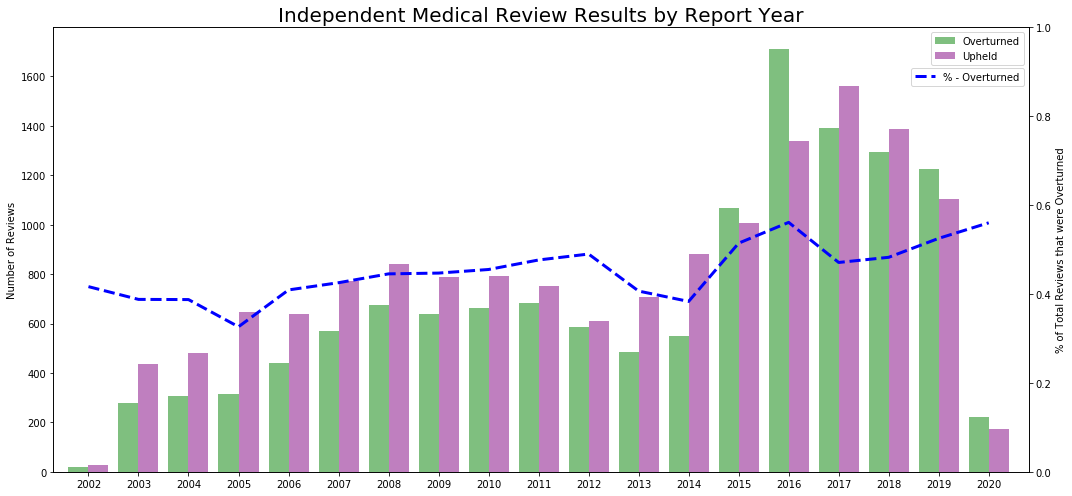

In [24]:
# DETERMINATION RESULTS BY REPORT YEAR
# Identify number of medical insurance rejection per year.
# Understand if the "raw number" trend is a result of the number of denials of medical care service.
# Covered CA enrolled commenced on October 1, 2013.
pos = list(range(len(det_yr['ReportYear'])))
width = 0.4

fig, ax1 = plt.subplots(figsize=(15,7))

ax1.bar(pos, det_yr['num_overturned'], width, alpha=0.5, color='g', label='Overturned')
ax1.bar([p + width for p in pos], det_yr['num_upheld'], width, alpha=0.5, color='purple', label='Upheld')
ax1.set_ylabel('Number of Reviews')
ax1.set_xticks([p + 0.5 * width for p in pos])
ax1.set_xticklabels(det_yr['ReportYear'])
ax1.set_title('Independent Medical Review Results by Report Year', fontsize=20)
ax1.legend();
ax1.set_xlim(-0.5, 19)

# Share x-axis
ax2=ax1.twinx()

ax2.set_ylabel('% of Total Reviews that were Overturned')
ax2.set_ylim(0,1)
ax2.plot([p + width/2 for p in pos], det_yr['percent_overturned'], color='b', linestyle='--', linewidth=3, 
         label='% - Overturned')

ax2.legend(bbox_to_anchor=(0.5, 0, 0.5, 0.92))

plt.tight_layout();


### Questions, thoughts & notes related "Determination Results by Report Year"

- Covered CA enrolled commenced on October 1, 2013.
- How many people insured per year? 
- How many medical/health-related procedures were denied by insurance per year? 
-  "In the period from 2016 to 2018, there was a decrease of 2.3 million people dropping out of coverage that did not get subsidies. That was a 44 percent decline.” - Peter Lee, Executive Director, Covered CA
- The Trump administration not only put less funding into advertising ACA insurance plans but also refused to reimburse insurers for discounts they were required to offer on deductibles and co-payments. Source: Sacramento Bee
- Insurers ended up steeply increasing insurance rates to account for that, and many consumers opted out of insurance because of the prices.
- California % of uninsured has decreased from 17.2% in 2013 to 7.3% in 2018. Source: U.S. Census Bureau
- 

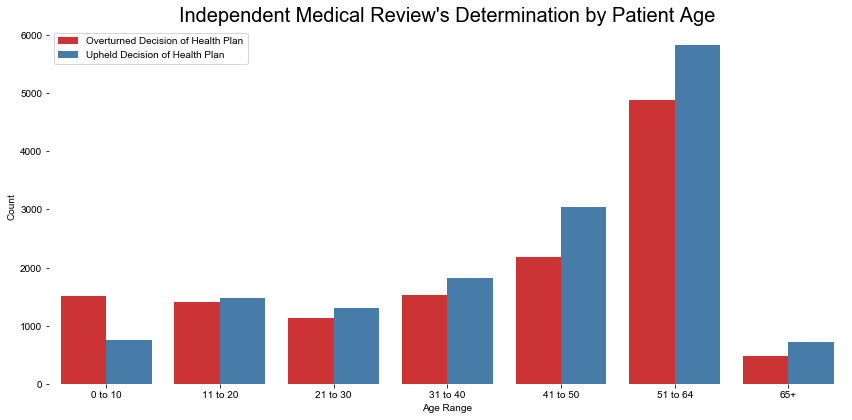

In [25]:
# Determination by Age
# SORT AGE RANGE
# Perform feature engineering.
# At a glance, it seems like the younger the patient, the more likely the the health plan's decision was overturned.
fig, ax = plt.subplots(figsize=(12,6))
age_order = ['0 to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', '51 to 64', '65+']
g = sns.countplot(x='AgeRange', data=imr2, order = age_order, hue='Determination', palette='Set1')
g.legend().set_title(None)
g.set(xlabel='Age Range', ylabel='Count')
g.set_title("Independent Medical Review's Determination by Patient Age", fontsize=20)
sns.despine(top=True, bottom=True, left=True, right=True)
sns.set(font='Arial')
plt.tight_layout();
fig.savefig('age.png')

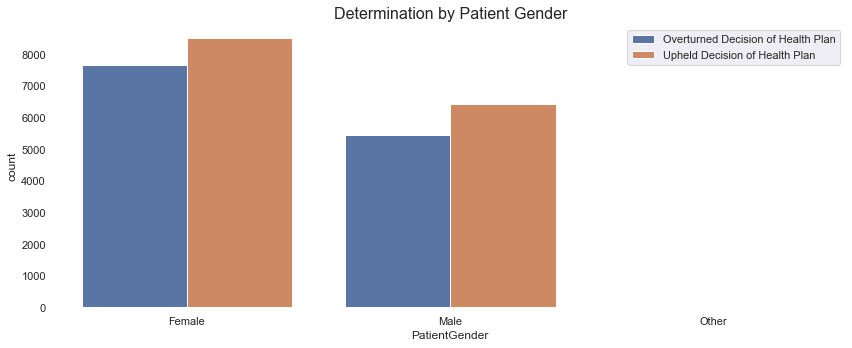

In [57]:
%matplotlib inline
# Determination by Patient Gender
fig, ax = plt.subplots(figsize=(12,5))
g = sns.countplot(x='PatientGender', data=imr2, hue='Determination')
ax.set_title('Determination by Patient Gender', fontsize=16)
g.legend().set_title(None)
sns.despine(top=True, bottom=True, left=True, right=True)
sns.set(font='Arial')
plt.tight_layout();
ax.grid(color=None, linestyle='None')
ax.set_facecolor('white');

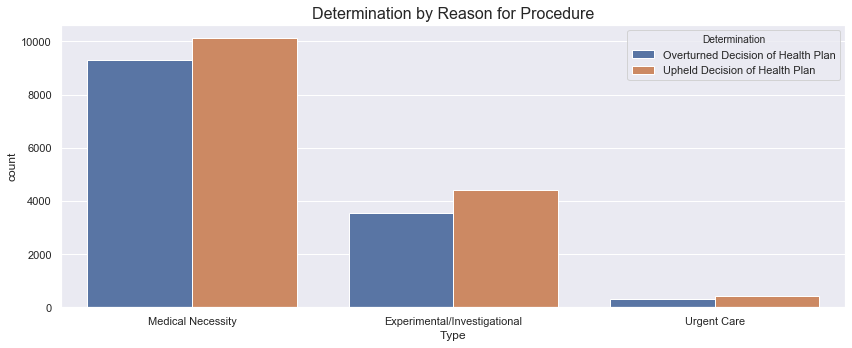

In [27]:
# DETERMINATION RESULTS BY REASON FOR PROCEDURE
# Slig
fig, ax = plt.subplots(figsize=(12,5))
g = sns.countplot(x='Type', data=imr2, hue='Determination')
ax.set_title('Determination by Reason for Procedure', fontsize=16)
plt.tight_layout();

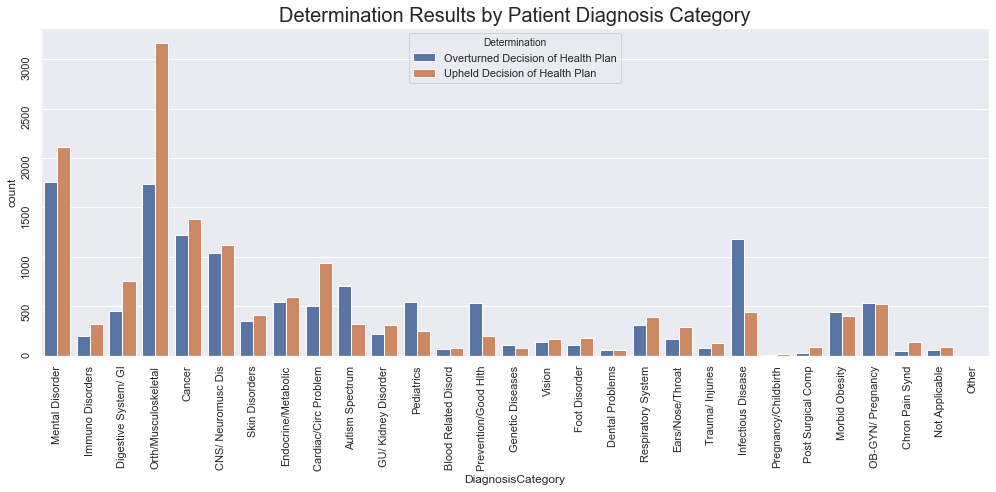

In [28]:
# DETERMINATION RESULTS BY DIAGNOSIS CATEGORY

# Diganosis categories where decisions were overturned more frequently than upheld:
# (1) Austism Spectrum; (2) Pediatrics; (3) Prevention/Good Health; (4) Infectious Disease

# Diagnosis categories where decisions were >=33% MORE LIKELY to be upheld than overturned:
# (1) Digestive System/GI (2) Orthopedic / Muskoskeletal; (3) Cardiac/Circulation Problems; (4) Foot Disorder
fig, ax = plt.subplots(figsize=(14,7))
g = sns.countplot(x='DiagnosisCategory', data=imr2, hue='Determination')
ax.set_title('Determination Results by Patient Diagnosis Category', fontsize=20)
ax.tick_params(labelrotation=90)
plt.tight_layout();


### Questions, thoughts & notes related "Determination Results by Patiente Diagnosis Category"

- Will insurance companies cover Covid-19 expenses? Strong history of arbitrators overturning denials toward IDs.

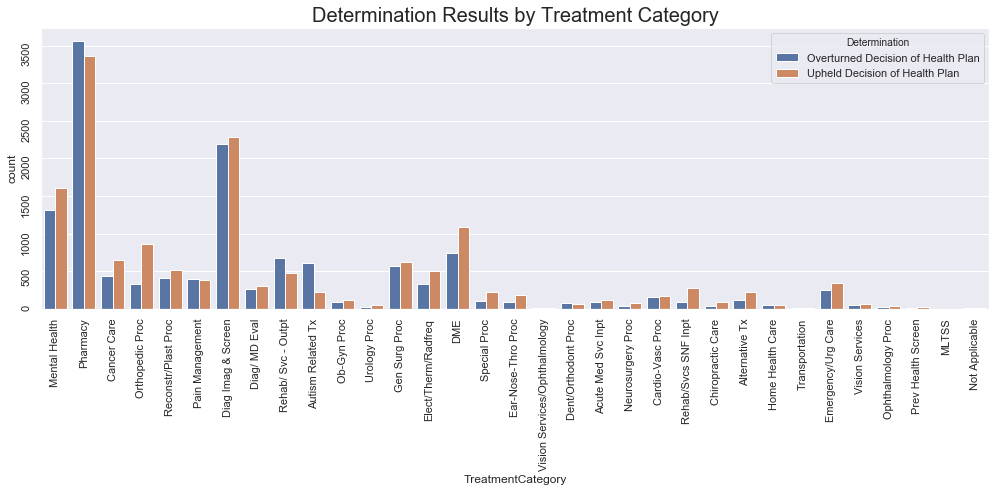

In [29]:
# DETERMINATION RESULTS BY TREATMENT CATEGORY
# DME = Durable Medical Equipment

fig, ax = plt.subplots(figsize=(14,7))
g = sns.countplot(x='TreatmentCategory', data=imr2, hue='Determination')
ax.set_title('Determination Results by Treatment Category', fontsize=20)
ax.tick_params(labelrotation=90)
plt.tight_layout();

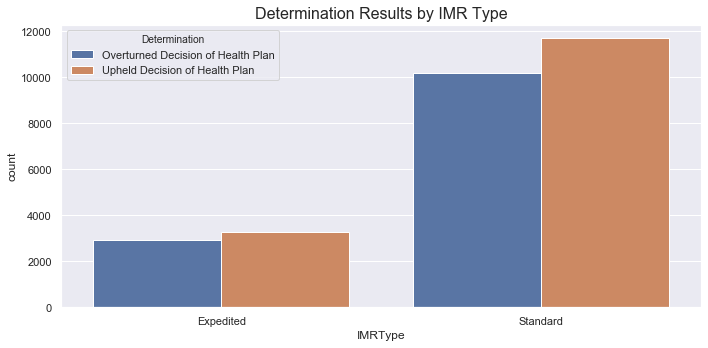

In [30]:
# DETERMINATION RESULTS BY TREATMENT CATEGORY
# DME = Durable Medical Equipment

fig, ax = plt.subplots(figsize=(10,5))
g = sns.countplot(x='IMRType', data=imr2, hue='Determination')
ax.set_title('Determination Results by IMR Type', fontsize=16)

plt.tight_layout();

---
## EDA focused on Children

## Feature Engineering

In [31]:
imr3 = imr2.copy()
imr3['len_findings'] = imr3['Findings'].apply(len)
imr3.describe()

,ReportYear,DaysToReview,DaysToAdopt,len_findings
count,28084.000000,28084.000000,28084.000000,28084.000000
mean,2012.890828,17.055441,38.330651,1533.049672
std,4.770499,10.134162,21.293209,824.321163
min,2001.000000,0.000000,2.000000,1.000000
25%,2009.000000,9.000000,27.000000,938.000000
50%,2014.000000,19.000000,37.000000,1457.000000
75%,2017.000000,21.000000,46.000000,1897.000000
max,2020.000000,133.000000,636.000000,6962.000000


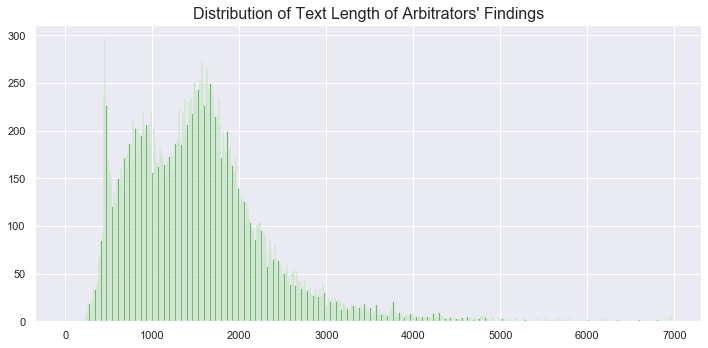

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(imr3['len_findings'], alpha=0.5, color='green', bins=500)
ax.set_title("Distribution of Text Length of Arbitrators' Findings", fontsize=16)
ax.grid(b=True, which='minor', linestyle='-')
plt.tight_layout()

In [33]:
imr3['determination_encoded'] = imr3['Determination'].map({'Upheld Decision of Health Plan' : 0, 
                                                           'Overturned Decision of Health Plan' : 1})
imr3.head()

,ReferenceID,ReportYear,DiagnosisCategory,DiagnosisSubCategory,TreatmentCategory,TreatmentSubCategory,Determination,Type,AgeRange,PatientGender,IMRType,DaysToReview,DaysToAdopt,Findings,len_findings,determination_encoded
0,MN20-32737,2020,Mental Disorder,Anxiety,Mental Health,RTC,Overturned Decision of Health Plan,Medical Necessity,11 to 20,Female,Expedited,1.0,12,Nature of Statutory Criteria/Case Summary: The...,3203,1
1,MN20-32736,2020,Immuno Disorders,Arthritis,Pharmacy,Pain Medication,Overturned Decision of Health Plan,Medical Necessity,51 to 64,Female,Expedited,2.0,12,Nature of Statutory Criteria/Case Summary: The...,2261,1
2,MN20-32735,2020,Digestive System/ GI,Crohn's Disease,Pharmacy,Biologics,Overturned Decision of Health Plan,Medical Necessity,21 to 30,Female,Expedited,5.0,11,Nature of Statutory Criteria/Case Summary: The...,2347,1
3,MN20-32734,2020,Orth/Musculoskeletal,Shoulder Problem/Pain,Pharmacy,Anti-Depressants,Upheld Decision of Health Plan,Medical Necessity,51 to 64,Female,Expedited,2.0,26,Nature of Statutory Criteria/Case Summary: The...,2858,0
4,MN20-32733,2020,Mental Disorder,AlcoholAbuse/Addiction,Mental Health,RTC,Overturned Decision of Health Plan,Medical Necessity,31 to 40,Male,Expedited,3.0,12,Nature of Statutory Criteria/Case Summary: The...,2710,1


---
## Hypothesis Test - Age Bias in Independent Medical Reviews (IMR) 

**Assumptions:**
1. The two populations are idependent and identically distributed.

> $$ p_C = P(\text{Child's denial of service is overturned}) $$
> $$ p_O = P(\text{All other-aged people's denial of service is overturned}) $$

> $$ H_0: \ p_C = p_O $$

> $$ H_A: \ p_C \geq p_O $$ 

In [34]:
children = np.asarray(imr3[imr3['AgeRange'] == '11 to 20']['determination_encoded'])
others = np.asarray(imr3[imr3['AgeRange'] != '11 to 20']['determination_encoded'])
len(children) + len(others) == len(imr3['AgeRange'])

True

In [35]:
mu_h_0 = 0
n_child = len(children)
p_c = sum(children) / n_child

n_others = len(others)
p_o = sum(others) / n_others

p_shared = sum(imr3['determination_encoded']) / len(imr3['determination_encoded'])
var_shared = p_shared * (1 - p_shared) / n_child + p_shared * (1 - p_shared) / n_others
std_err_shared = np.sqrt(var_shared)
# mu for the alternative hypothesis
diff_in_smpl_prob  = p_c - p_o


print('Probability for children: {:.4f}'.format(p_c))
print('Probability for all other age: {:.4f}'.format(p_o))
print("Difference in the sample probabilities: {:.4f}".format(diff_in_smpl_prob))

Probability for children: 0.4877
Probability for all other age: 0.4650
Difference in the sample probabilities: 0.0227


In [36]:
mu_h_A = diff_in_smpl_prob

h_0_dist = stats.norm(mu_h_0, std_err_shared)
h_a_dist = stats.norm(mu_h_A, std_err_shared)

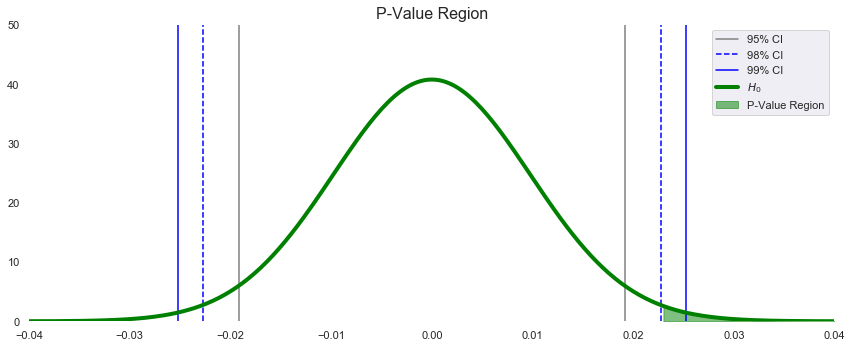

In [60]:
# Calculate and plot p-value
fig, ax = plt.subplots(figsize=(12,5))

x_arr = np.linspace(-0.06, 0.06, 400)


# Calculate and plot 95% CI
up_95_lim = mu_h_0 + 1.96 * std_err_shared
low_95_lim = mu_h_0 - 1.96 * std_err_shared
ax.axvline(up_95_lim, c='grey', linestyle='-', label='95% CI')
ax.axvline(low_95_lim, c='grey', linestyle='-')

# Calculate and plot 98% CI
up_98_lim = mu_h_0 + 2.326 * std_err_shared
low_98_lim = mu_h_0 - 2.326 * std_err_shared
ax.axvline(up_98_lim, c='blue', linestyle='--', label='98% CI')
ax.axvline(low_98_lim, c='blue', linestyle='--')


# Calculate and plot 99% CI
up_99_lim = mu_h_0 + 2.58 * std_err_shared
low_99_lim = mu_h_0 - 2.58 * std_err_shared
ax.axvline(up_99_lim, c='blue', linestyle='-', label='99% CI')
ax.axvline(low_99_lim, c='blue', linestyle='-')

# Plot H0
ax.plot(x_arr, h_0_dist.pdf(x_arr), c='green', label='$H_0$', linewidth=4)

p_val = 1 - h_0_dist.cdf(diff_in_smpl_prob)
ax.fill_between(x_arr, h_0_dist.pdf(x_arr), where=(x_arr >= diff_in_smpl_prob), color='green', alpha=0.5, 
                label='P-Value Region')
ax.set_title("P-Value Region", fontsize=16)
ax.legend()

# Formatting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(color=None, linestyle='None')
ax.set_facecolor('white')
ax.set_xlim(-0.04, 0.04)
ax.set_ylim(0, 50)
fig.tight_layout();

### Conclusion

With a level of confidence of ~98%, an arbitator is more likely to overturn the denial of medical insurance coverage to a child (10 years and younger) than patients of other ages.

### Mann-Whitney U Statistics (or Rank-Sum Statistic)

In [38]:
# ONE-SIDED T-TEST
u_stat_mw, p_val_mw = stats.mannwhitneyu(children, others, alternative='greater')
print("Mann-Whitney U-Statistic: {:.4f}".format(u_stat_mw))
print("Mann-Whitney P-Value: {:.4f}".format(p_val_mw))

Mann-Whitney U-Statistic: 37313153.0000
Mann-Whitney P-Value: 0.0101


### Welch's T-test

In [39]:
var_children = np.var(children)
var_others = np.var(others)

# Signficant difference in sample sizes; therefore, Welch's T-test is appropriate.
print("Children sample variance: {:.4f}".format(var_children))
print("Children sample size: {:.0f}".format(n_child))
print("Others sample variance: {:.4f}".format(var_others))
print("Others sample size: {:.0f}".format(n_others))

Children sample variance: 0.2498
Children sample size: 2897
Others sample variance: 0.2488
Others sample size: 25187


In [40]:
def welch_t_test(sample_1, sample_2):
    num = np.mean(sample_1) - np.mean(sample_2)
    denom = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return num / np.sqrt(denom)

In [41]:
t_stat = welch_t_test(children, others)
print("Welch's t-statistic: {:2.4f}".format(t_stat))
# If equal_var is NOT set to False, then stats.ttest_ind() perfoms the Student's t-test.
print(stats.ttest_ind(children, others, equal_var = False))

Welch's t-statistic: 2.3198
Ttest_indResult(statistic=2.3194847625266766, pvalue=0.020424578322708956)


---
## Statistical Power

The probability to determine that the likelihood of a child's medical review being overturned is greater than patients older than ten years old when, in fact, it is true.

$$ \text{Power} = P( \text{Reject } H_0 \mid H_0 \text{ is false}) $$


alpha = 0.490
beta = 0.358


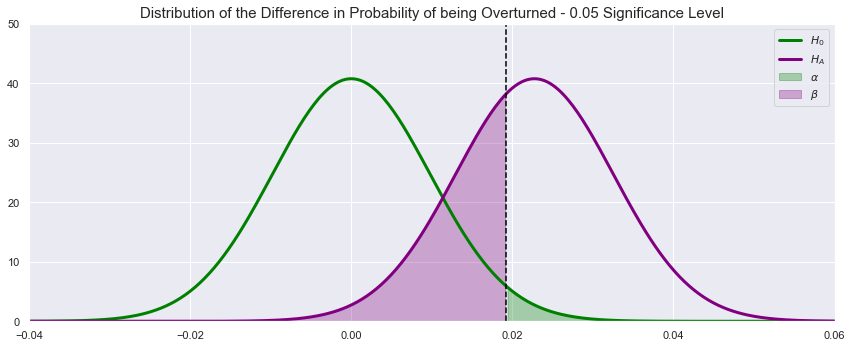

In [42]:
# CALCULATE POWER
# Evaluate the affect of the assumed significance level on alpha, beta, and power.
# Possible significance levels('sig_lev') are 0.01, 0.02, and 0.05.
sig_lev = 0.05
sl_dict ={0.05: up_95_lim, 0.02: up_98_lim, 0.01: up_99_lim}
alpha = (1 - sl_dict[sig_lev]) / 2
beta = h_a_dist.cdf(sl_dict[sig_lev])

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(x_arr, h_0_dist.pdf(x_arr), c='green', label='$H_0$', linewidth=3)

#Plot alternative hypothesis
ax.plot(x_arr, h_a_dist.pdf(x_arr), c='purple', label='$H_A$', linewidth=3)

ax.axvline(sl_dict[sig_lev], c='black', linestyle='--')
ax.fill_between(x_arr, h_0_dist.pdf(x_arr), where=(x_arr >= sl_dict[sig_lev]), color='green', alpha=0.3, label=r'$\alpha$')
ax.fill_between(x_arr, h_a_dist.pdf(x_arr), where=(x_arr <= sl_dict[sig_lev]), color='purple', alpha=0.3, label=r'$\beta$')

ax.set_title('Distribution of the Difference in Probability of being Overturned - {:.2} Significance Level'.format(sig_lev), 
             fontsize=15)

ax.set_xlim([-0.04,0.06])
ax.set_ylim([0,50])
fig.tight_layout();
ax.legend();


print('alpha = {:.3f}'.format(alpha))
print('beta = {:.3f}'.format(beta))

# plt.savefig("for_ppt.pdf", bbox_inches="tight")

Power = 0.642


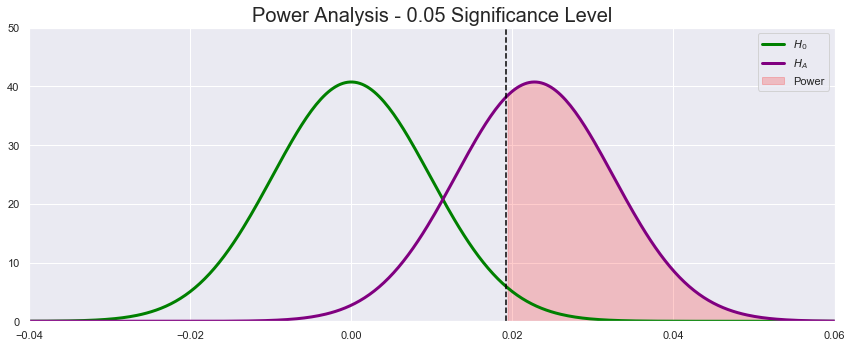

In [43]:
# POWER ANALYSIS
# Generally-accepted Power treshold is 0.8.
power = 1 - h_a_dist.cdf(sl_dict[sig_lev])

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(x_arr, h_0_dist.pdf(x_arr), c='green', label='$H_0$', linewidth=3)

#Plot alternative hypothesis
ax.plot(x_arr, h_a_dist.pdf(x_arr), c='purple', label='$H_A$', linewidth=3)

ax.axvline(sl_dict[sig_lev], c='black', linestyle='--')
ax.fill_between(x_arr, h_a_dist.pdf(x_arr), where=(x_arr >= sl_dict[sig_lev]), color='red', alpha=0.2, label='Power')

ax.set_title('Power Analysis - {:.2} Significance Level'.format(sig_lev), fontsize=20)

ax.set_xlim([-0.04,0.06])
ax.set_ylim([0,50])
fig.tight_layout();
ax.legend();

print('Power = {:.3f}'.format(power))


# plt.savefig("for_ppt.pdf", bbox_inches="tight")

---
## Bayesian Inference 

**Question:** If the patient is a child ( <= 10 years), what is the probability that an independent review of denied insurance coverage will result in an overturned decision?

>### P(D | $\theta$) ~ Binom(



In [44]:
# Children
alpha_bayes_child = sum(children) + 1
beta_bayes_child = n_child - sum(children) + 1
posterior_dist_child = stats.distributions.beta(alpha_bayes_child, beta_bayes)

# Others
alpha_bayes_others = sum(others) + 1
beta_bayes_others = n_others - sum(others) + 1
posterior_dist_others = stats.distributions.beta(alpha_bayes_others, beta_bayes_others)

NameError: name 'beta_bayes' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

x_arr2 = np.linspace(0, 1, 2000)
ax.plot(x_arr2, posterior_dist_child.pdf(x_arr2), label='Children', linewidth=3)
ax.plot(x_arr2, posterior_dist_others.pdf(x_arr2), label='Others', linewidth=3)
ax.legend()
ax.set_title("Posterior Distribution of an Arbitrator Overruling Given a Patient's Age", fontsize=16)
ax.set_xlabel('p')
ax.set_ylabel('pdf')
ax.set_ylim(ymin=0)
ax.set_xlim(0.425, 0.575);

### Simulation to Quantify the Difference in Likelihood of an IMR Resulting in Overturn

In [ ]:
samp_child = posterior_dist_child.rvs(size=100000)
samp_others = posterior_dist_others.rvs(size=100000)

(samp_child > samp_others).mean()

---
## Additional EDA

In [ ]:
num_pediatric = len(imr2[imr2['DiagnosisCategory']=='Pediatrics'])
num_autism = len(imr2[imr2['DiagnosisCategory']=='Autism Spectrum'])
print('Total # of Pediatric Cases: {}'.format(num_pediatric))
print('Total # of Autism Spectrum Cases: {}'.format(num_autism))
print('Total # of Child cases: {}'.format(n_child))

In [ ]:
autism_df = imr2[imr2['DiagnosisCategory']=='Autism Spectrum']
autism_df.loc[:,'Child'] = autism_df.loc[:,'AgeRange'].apply(lambda x: True if x == '0 to 10' else False)
autism_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
g = sns.countplot(x='Child', hue='Determination', data=autism_df)